In [7]:
using Pkg
pkg"activate ."
pkg"add Plots"
pkg"add GR"
pkg"add ORCA"
pkg"add PlotlyJS"

 Activating environment at `~/Documents/streaming/notebooks/tutorials/plots/Project.toml`
  Resolving package versions...
   Updating `~/Documents/streaming/notebooks/tutorials/plots/Project.toml`
 [no changes]
   Updating `~/Documents/streaming/notebooks/tutorials/plots/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/Documents/streaming/notebooks/tutorials/plots/Project.toml`
 [no changes]
   Updating `~/Documents/streaming/notebooks/tutorials/plots/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/Documents/streaming/notebooks/tutorials/plots/Project.toml`
 [no changes]
   Updating `~/Documents/streaming/notebooks/tutorials/plots/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/Documents/streaming/notebooks/tutorials/plots/Project.toml`
  [f0f68f2c] + PlotlyJS v0.13.1
   Updating `~/Documents/streaming/notebooks/tutorials/plots/Manifest.toml`
  [bf4720bc] + AssetRegistry v0.1.0
  [9e28174c] + BinDeps v1.

In [8]:
pkg"status"

Status `~/Documents/streaming/notebooks/tutorials/plots/Project.toml`
  [28b8d3ca] GR v0.48.0
  [47be7bcc] ORCA v0.3.1
  [f0f68f2c] PlotlyJS v0.13.1
  [91a5bcdd] Plots v1.0.3


In [9]:
using Plots

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260


**Backend**

O que vai estar desenhando de verdade.
- GR
- PyPlot
- PlotlyJS
- PDFPlots
- UnicodePlots

In [372]:
gr(size = (400, 300))
#plotlyjs(size = (400, 300))

Plots.GRBackend()

`plot(x, y)` e `scatter(x, y)`
- `x` são as coordenadas x
- `y` são as coordenadas y

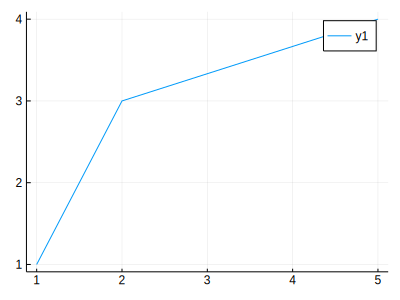

In [373]:
x = [1, 2, 5]
y = [1, 3, 4]
plot(x, y)

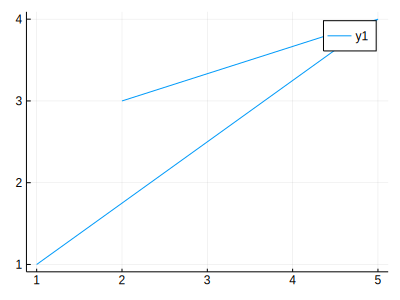

In [374]:
x = [1, 5, 2]
y = [1, 4, 3]
plot(x, y)

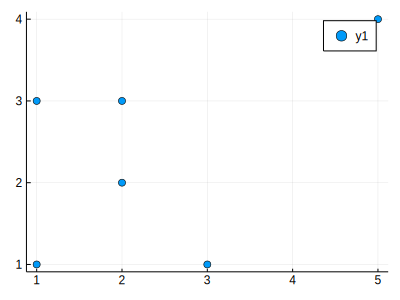

In [375]:
x = [1, 5, 2, 1, 2, 3]
y = [1, 4, 3, 3, 2, 1]
scatter(x, y)

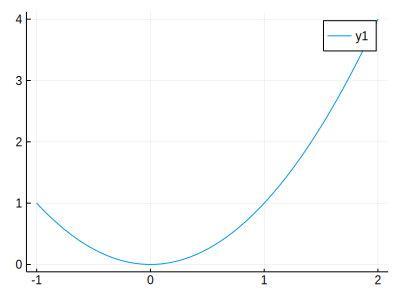

In [376]:
f(x) = x^2
x = range(-1, 2, length=50) # 50 pontos de -1 à 2
y = f.(x)
plot(x, y)

`plot(f, a, b)`
- `f` é a função
- `[a,b]` o intervalo

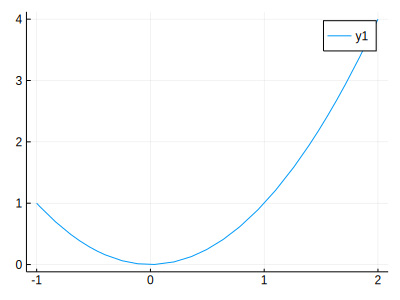

In [377]:
f(x) = x^2
plot(f, -1, 2)

Opções:
- `color` ou `c`: símbolo da cor, ou "#RRGGBB, ou RGB(r, g, b)
- `linewidth` ou `lw`: grossura da linha
- `label` ou `lab`: texto da legenda
- `marker` ou `m`: marcador
- `markersize` ou `ms`: tamanho do marcador
- `markercolor` ou `mc`: cor do marcador
- `annotation`: lista de triplas `(x,y,t)` onde `t` é um texto ou `text(texto, tamanho)`
- `linestyle` ou `l`: tipo da linha `:solid`, `:dot`, `:dash` por exemplo
- `grid`
- `axis`
- `xticks` e `yticks`
- `xaxis` e `yaxis`
- `xlabel`, `ylabel` e `titulo`

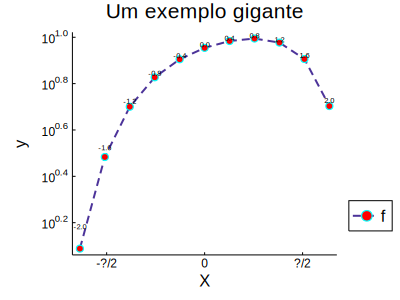

In [378]:
f(x) = exp(-x) * sin(x) + cos(x) * exp(x) + 8
x = range(-2, 2, length=11)
y = f.(x)
plot(x, y, c=RGB(0.3, 0.2, 0.6), lw=2, lab="f",
    annotation=[(x[i], y[i] + 0.3, text(string(x[i]), 5)) for i = 1:11],
    m=(:circle, 4, :red, stroke(2,:cyan)), linestyle=:dash,
    grid=false, axis=true, yaxis=:log,
    #xticks=([-π / 2, 0, π / 2], ["-\\pi/2", "0", "\\pi/2"]), # GR
    xticks=([-π / 2, 0, π / 2], ["-π/2", "0", "π/2"]),  # PlotlyJS
    legend=:outerbottomright,
    xlabel="X", ylabel="y", title="Um exemplo gigante"
)

Mais plots
- comando com !, e.g, plot! ou scatter!

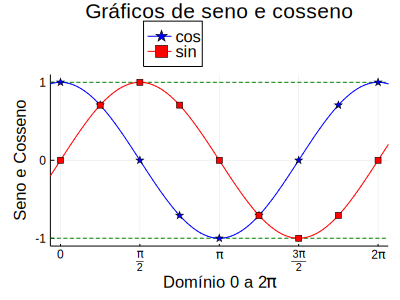

In [379]:
x = range(-0.2, 2π + 0.2, length=100)
xa = range(0, 2π, length=9)
ycos = cos.(x)
ycosa = cos.(xa)
ysin = sin.(x)
ysina = sin.(xa)

plot(legend=:outertop)

plot!([-0.2, 2π + 0.2], [1, 1], c=:green, lab="", l=:dash)
plot!([-0.2, 2π + 0.2], [-1, -1], c=:green, lab="", l=:dash)
plot!(x, ycos, c=:blue, lab="cos", m=:star, ms=0.1) # marcador fantasma
scatter!(xa, ycosa, c=:blue, m=:star, lab="") # marcador de vdd
plot!(x, ysin, c=:red, lab="sin", m=:square, ms=0.1)
scatter!(xa, ysina, c=:red, m=:square, ms=3, lab="")

xlims!(-0.2, 2π + 0.2)
ylims!(-1.1, 1.1)
xticks!(0:π/2:2π, ["0", "\\pi/2", "\\pi", "3\\pi/2", "2\\pi"])
yticks!([-1, 0, 1])

xlabel!("Domínio 0 a 2\\pi")
ylabel!("Seno e Cosseno")
title!("Gráficos de seno e cosseno")

#png("sin-cos")
#savefig("sin-cos.svg")

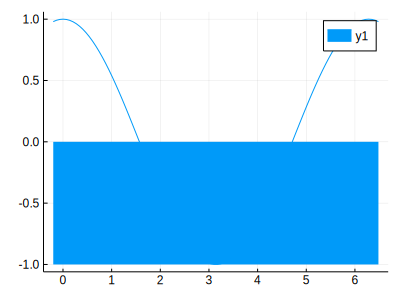

In [380]:
x = range(-0.2, 2π + 0.2, length=100)
y = cos.(x)
plot(x, y, fill_between=(-1,0))

In [381]:
gr(size=(400,300))

Plots.GRBackend()

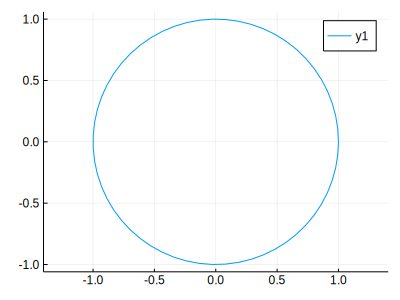

In [382]:
# x^2 + y^2 = 1
t = range(0, 2π, length=60)
x = cos.(t)
y = sin.(t)
plot(x, y, aspect_ratio=:equal)

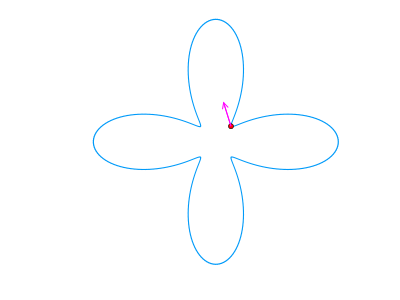

In [383]:
t = range(0, 6π, length=360)

rx(t) = cos(t) * (1 + 0.7 * cos(4t))
ry(t) = sin(t) * (1 + 0.7 * cos(4t))

x = rx.(t)
y = ry.(t)

a = 0.8

drx(t) = (rx(t + 1e-8) - rx(t)) / 1e-8
dry(t) = (ry(t + 1e-8) - ry(t)) / 1e-8

plot(x, y, aspect_ratio=:equal, leg=false, axis=false, grid=false)
scatter!([rx(a)], [ry(a)], c=:red, ms=3)
plot!([rx(a), rx(a) + drx(a)],
      [ry(a), ry(a) + dry(a)],
      c=:magenta, l=:arrow)

In [384]:
pkg"add ForwardDiff" # Derivada numérica

  Resolving package versions...
   Updating `~/Documents/streaming/notebooks/tutorials/plots/Project.toml`
 [no changes]
   Updating `~/Documents/streaming/notebooks/tutorials/plots/Manifest.toml`
 [no changes]


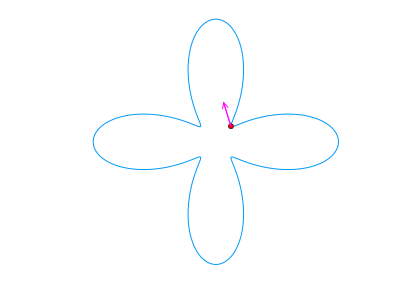

In [385]:
using ForwardDiff

t = range(0, 2π, length=360)

rx(t) = cos(t) * (1 + 0.7 * cos(4t))
ry(t) = sin(t) * (1 + 0.7 * cos(4t))

x = rx.(t)
y = ry.(t)

a = 0.8

drx(t) = ForwardDiff.derivative(rx, t)
dry(t) = ForwardDiff.derivative(ry, t)

plot(x, y, aspect_ratio=:equal, leg=false, axis=false, grid=false)
scatter!([rx(a)], [ry(a)], c=:red, ms=3)
plot!([rx(a), rx(a) + drx(a)],
      [ry(a), ry(a) + dry(a)],
      c=:magenta, l=:arrow)

┌ Info: Saved animation to 
│   fn = /home/abel/Documents/streaming/notebooks/tutorials/plots/tmp.gif
└ @ Plots /home/abel/.julia/packages/Plots/nnd5O/src/animation.jl:102


Plots.AnimatedGif("/home/abel/Documents/streaming/notebooks/tutorials/plots/tmp.gif")
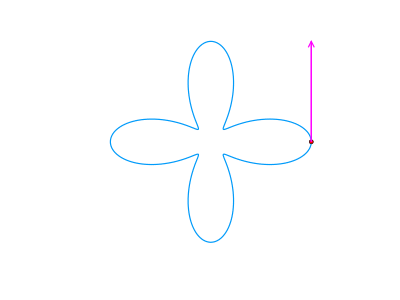

In [386]:
using ForwardDiff

t = range(0, 2π, length=360)

rx(t) = cos(t) * (1 + 0.7 * cos(4t))
ry(t) = sin(t) * (1 + 0.7 * cos(4t))

x = rx.(t)
y = ry.(t)

drx(t) = ForwardDiff.derivative(rx, t)
dry(t) = ForwardDiff.derivative(ry, t)

@gif for a = 0:0.01π:2π
    plot(x, y, aspect_ratio=:equal, leg=false, axis=false, grid=false)
    scatter!([rx(a)], [ry(a)], c=:red, ms=3)
    plot!([rx(a), rx(a) + drx(a)],
          [ry(a), ry(a) + dry(a)],
          c=:magenta, l=:arrow)
    xlims!(-2.2, 2.2)
    ylims!(-2.2, 2.2)
end

┌ Info: Saved animation to 
│   fn = /home/abel/Documents/streaming/notebooks/tutorials/plots/exemplo-animacao.gif
└ @ Plots /home/abel/.julia/packages/Plots/nnd5O/src/animation.jl:102


Plots.AnimatedGif("/home/abel/Documents/streaming/notebooks/tutorials/plots/exemplo-animacao.gif")
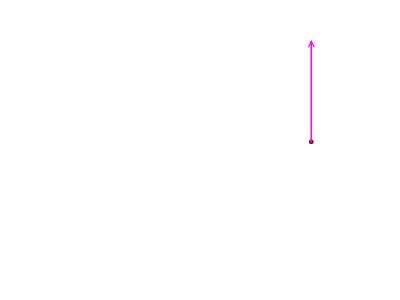

In [387]:
using ForwardDiff

t = range(0, 2π, length=360)

rx(t) = cos(t) * (1 + 0.7 * cos(4t))
ry(t) = sin(t) * (1 + 0.7 * cos(4t))

x = rx.(t)
y = ry.(t)

drx(t) = ForwardDiff.derivative(rx, t)
dry(t) = ForwardDiff.derivative(ry, t)

anim = Animation()
for i = 1:5:360
    a = t[i]
    plot(x[1:i], y[1:i], aspect_ratio=:equal, leg=false, axis=false, grid=false)
    scatter!([rx(a)], [ry(a)], c=:red, ms=3)
    plot!([rx(a), rx(a) + drx(a)],
          [ry(a), ry(a) + dry(a)],
          c=:magenta, l=:arrow)
    xlims!(-2.2, 2.2)
    ylims!(-2.2, 2.2)
    
    frame(anim)
end

gif(anim, "exemplo-animacao.gif", fps=24)

**Plots 3d**

- plot(x, y, z), scatter(x, y, z)

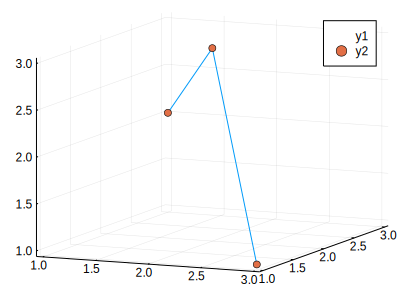

In [388]:
plot([1, 2, 3], [3, 2, 1], [2, 3, 1])
scatter!([1, 2, 3], [3, 2, 1], [2, 3, 1])

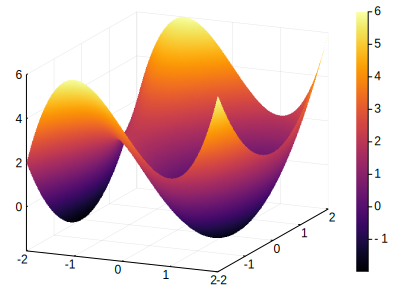

In [389]:
f(x, y) = x^3 - 3x + y^2

xg = range(-2, 2, length=100)
yg = range(-2, 2, length=100)

surface(xg, yg, f, camera=(30, 40))

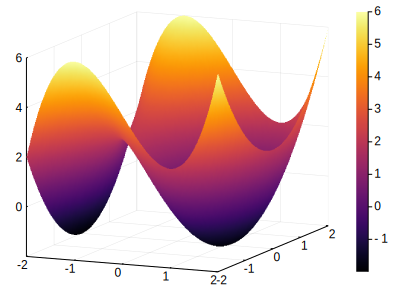

In [390]:
#plotlyjs(size=(400,300))
f(x, y) = x^3 - 3x + y^2

xg = range(-2, 2, length=100)
yg = range(-2, 2, length=100)

surface(xg, yg, f)

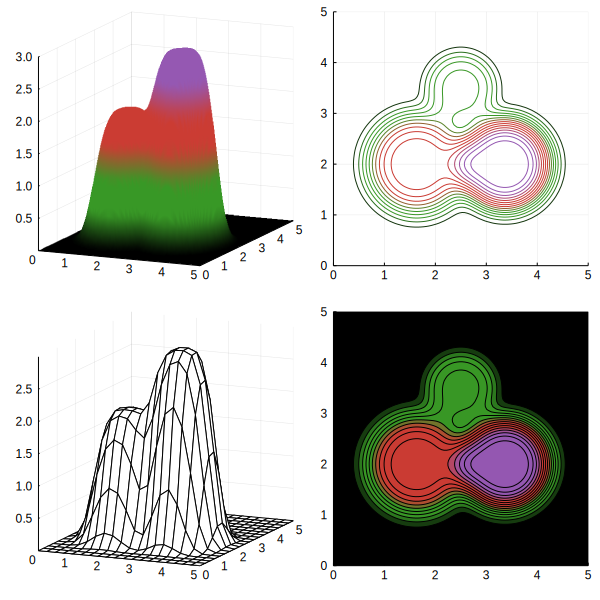

In [393]:
gr(size=(400,300))
dark_purple = RGB(0.584, 0.345, 0.698)
dark_red    = RGB(0.796, 0.235, 0.200)
dark_green  = RGB(0.220, 0.596, 0.149)
black       = RGB(0.0, 0.0, 0.0)
colors = [black, dark_green, dark_green,
    dark_red, dark_red, dark_purple, dark_purple]

L = 5
u0(x, y) = begin
  d = [(x,y) -> ((x - sin(2π/3*i))^2 + (y - cos(2π/3*i))^2)^2 for i = 1:3]
  xx, yy = x - L / 2, y - L / 2
  return 3*exp(-sqrt(2)*d[1](xx,yy)) + 2*exp(-d[2](xx,yy)) + exp(-4*d[3](xx,yy))
end

grid = range(0, L, length=100)
gridr = range(0, L, length=20)
layout = @layout [a b; c d]
p = plot(layout=layout, size=(600,600), leg=false)
surface!(p[1], grid, grid, u0, c=ColorGradient(colors))
contour!(p[2], grid, grid, u0, c=ColorGradient(colors))
wireframe!(p[3], gridr, gridr, u0, c=ColorGradient(colors))
contourf!(p[4], grid, grid, u0, c=ColorGradient(colors))

In [394]:
#plotlyjs(size=(400,300))

┌ Info: Saved animation to 
│   fn = /home/abel/Documents/streaming/notebooks/tutorials/plots/jso-girando.gif
└ @ Plots /home/abel/.julia/packages/Plots/nnd5O/src/animation.jl:102


Plots.AnimatedGif("/home/abel/Documents/streaming/notebooks/tutorials/plots/jso-girando.gif")
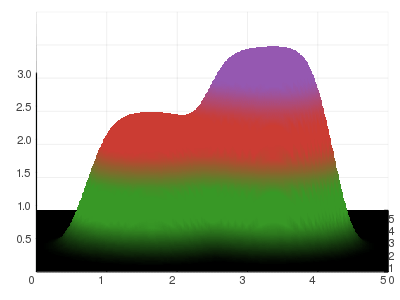

In [398]:
dark_purple = RGB(0.584, 0.345, 0.698)
dark_red    = RGB(0.796, 0.235, 0.200)
dark_green  = RGB(0.220, 0.596, 0.149)
black       = RGB(0.0, 0.0, 0.0)
colors = [black, dark_green, dark_green,
    dark_red, dark_red, dark_purple, dark_purple]

L = 5
u0(x, y) = begin
  d = [(x,y) -> ((x - sin(2π/3*i))^2 + (y - cos(2π/3*i))^2)^2 for i = 1:3]
  xx, yy = x - L / 2, y - L / 2
  return 3*exp(-sqrt(2)*d[1](xx,yy)) + 2*exp(-d[2](xx,yy)) + exp(-4*d[3](xx,yy))
end

grid = range(0, L, length=100)
layout = @layout [a b; c d]

anim = Animation()
for θ in range(0, 90, length=60)
    surface(grid, grid, u0, c=ColorGradient(colors), leg=false,
            camera=(θ,30)
        )
    frame(anim)
end

gif(anim, "jso-girando.gif", fps=24)

**Campo vetorial**

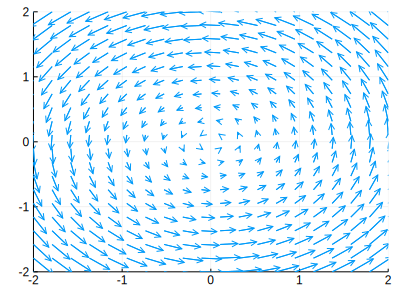

In [399]:
gr(size=(400,300))
F(x,y) = [-y; x]

xg = range(-2, 2, length=20)
yg = range(-2, 2, length=20)
XG = repeat(xg, outer=length(yg)) # Meshgrid
YG = repeat(yg, inner=length(xg))
UV = F.(XG, YG)
u = [uv[1] for uv in UV]
v = [uv[2] for uv in UV]
maxuv = 2.8 * maximum(sqrt.(u.^2 + v.^2))
u = u / maxuv
v = v / maxuv

quiver(XG, YG, quiver=(u,v))
xlims!(-2, 2)
ylims!(-2, 2)

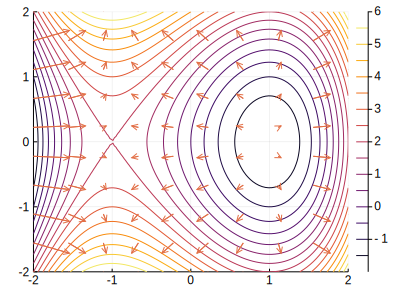

In [400]:
using ForwardDiff
gr(size=(400,300))

f(x) = x[1]^3 - 3x[1] + x[2]^2
F(x) = ForwardDiff.gradient(f, x)

xg = range(-2, 2, length=10)
yg = range(-2, 2, length=10)
XG = repeat(xg, outer=length(yg)) # Meshgrid
YG = repeat(yg, inner=length(xg))
UV = F.([[XG[i]; YG[i]] for i = 1:length(XG)])
u = [uv[1] for uv in UV]
v = [uv[2] for uv in UV]
maxuv = 2.0 * maximum(sqrt.(u.^2 + v.^2))
u = u / maxuv
v = v / maxuv

xg = range(-2, 2, length=100)
yg = range(-2, 2, length=100)
contour(xg, yg, (x,y) -> f([x;y]))
quiver!(XG, YG, quiver=(u,v))
xlims!(-2, 2)
ylims!(-2, 2)